Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [x] If you haven't completed assignment #1, please do so first.
- [x] Continue to clean and explore your data. Make exploratory visualizations.
- [x] Fit a model. Does it beat your baseline? 
- [x] Try xgboost.
- [x] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [1]:
import pandas as pd

In [3]:
train = pd.read_excel('train.xlsx')
val = pd.read_excel('val.xlsx')
test = pd.read_excel('test.xlsx')

In [4]:
train.columns

Index(['NS_code_from_gini', 'Nation_State', 'T_HDI_Mean_plus_5',
       'T_HDI_Trend_plus_5', 'T_State_Fail_yr_1', 'T_State_Fail_plus_5',
       'T_State_Fail_yr_5', 'year0', 'CWGI_Poli_Stabl_Mean_minus_4',
       'CWGI_Poli_Stabl_Trend_minus_4', 'CWGI_RoL_Mean_minus_4',
       'CWGI_RoL_Trend_minus_4', 'E_GINI_Mean_minus_4', 'E_GINI_Trend_minus_4',
       'PCPI_std_Mean_minus_4', 'PCPI_std_Trend_minus_4',
       'PWGI_Corrupt_Ctrl_Mean_minus_4', 'PWGI_Corrupt_Ctrl_Trend_minus_4',
       'PWGI_Voice_Acct_Mean_minus_4', 'PWGI_Voice_Acct_Trend_minus_4'],
      dtype='object')

In [5]:
features = ['NS_code_from_gini', 'year0', 'CWGI_Poli_Stabl_Mean_minus_4',
       'CWGI_Poli_Stabl_Trend_minus_4', 'CWGI_RoL_Mean_minus_4',
       'CWGI_RoL_Trend_minus_4', 'E_GINI_Mean_minus_4', 'E_GINI_Trend_minus_4',
       'PCPI_std_Mean_minus_4', 'PCPI_std_Trend_minus_4',
       'PWGI_Corrupt_Ctrl_Mean_minus_4', 'PWGI_Corrupt_Ctrl_Trend_minus_4',
       'PWGI_Voice_Acct_Mean_minus_4', 'PWGI_Voice_Acct_Trend_minus_4']
target = 'T_State_Fail_yr_5'

In [6]:
X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

In [10]:
from xgboost import XGBClassifier
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [8]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['NS_code_from_gini'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'NS_code_from_gini',
                                          'data_type': dtype('O'),
                                          'mapping': SUR      1
TUN      2
SLE      3
KGZ      4
BOL      5
      ... 
MWI    175
BGD    176
THA    177
PER    178
NaN     -2
Length: 179, dtype: int64}],
                                return_df=True, verbose=0)),
                ('xgbclassifier',
                 XGBCl...ster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=No

In [11]:
y_pred = pipeline.predict(X_val)
print('Validation f_score = ', f1_score(y_val, y_pred))
print('Validation roc_auc_score = ', roc_auc_score(y_val, y_pred))

Validation f_score =  0.4642857142857143
Validation roc_auc_score =  0.6789024622112367


In [45]:
# from sklearn.metrics import make_scorer
import numpy as np
def f1eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-(f1_score(y_true, np.round(y_pred)))
    return 'f1_err', err

encoder = ce.OrdinalEncoder()
X_train_enc = encoder.fit_transform(X_train)
X_val_enc = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators = 1000,
    max_depth = 8,
    learning_rate = 0.5,
    n_jobs = -1,
    disable_default_eval_metric = 1
)

evaluators = [(X_train_enc, y_train),
             (X_val_enc, y_val)]

model.fit(X_train_enc, y_train,
         eval_set = evaluators,
         eval_metric = f1eval,
         early_stopping_rounds = 50)

[0]	validation_0-f1_err:0.435169	validation_1-f1_err:0.592233
Multiple eval metrics have been passed: 'validation_1-f1_err' will be used for early stopping.

Will train until validation_1-f1_err hasn't improved in 50 rounds.
[1]	validation_0-f1_err:0.254545	validation_1-f1_err:0.483333
[2]	validation_0-f1_err:0.184211	validation_1-f1_err:0.404959
[3]	validation_0-f1_err:0.145714	validation_1-f1_err:0.38843
[4]	validation_0-f1_err:0.104972	validation_1-f1_err:0.34375
[5]	validation_0-f1_err:0.090411	validation_1-f1_err:0.359375
[6]	validation_0-f1_err:0.074224	validation_1-f1_err:0.343511
[7]	validation_0-f1_err:0.068826	validation_1-f1_err:0.380952
[8]	validation_0-f1_err:0.059299	validation_1-f1_err:0.376
[9]	validation_0-f1_err:0.049137	validation_1-f1_err:0.354331
[10]	validation_0-f1_err:0.039683	validation_1-f1_err:0.359375
[11]	validation_0-f1_err:0.031579	validation_1-f1_err:0.354331
[12]	validation_0-f1_err:0.027451	validation_1-f1_err:0.338583
[13]	validation_0-f1_err:0.022164

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=1, gamma=0, learning_rate=0.5,
              max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
              n_estimators=1000, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

## With an ROC_AUC of 0.970125, XGBoost beats my MV model (decision tree ) by 0.16!

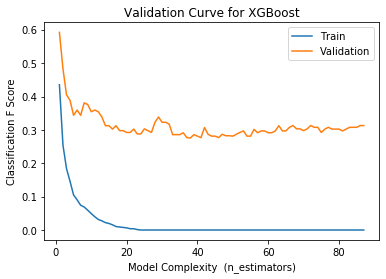

In [47]:
import matplotlib.pyplot as plt

results = model.evals_result()

train_error = results['validation_0']['f1_err']
val_error = results['validation_1']['f1_err']
epoch = list(range(1, len(train_error)+1))

plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')

plt.ylabel('Classification F Score')
plt.xlabel('Model Complexity  (n_estimators)')

plt.title('Validation Curve for XGBoost')
plt.legend();

In [48]:
import eli5
from eli5.sklearn import PermutationImportance

In [49]:
# transformer = make_pipeline(
#     ce.OrdinalEncoder)

permuter = PermutationImportance(
    model,
    scoring = 'f1',
    n_iter = 5,
    random_state = 42
)

permuter.fit(X_train_enc, y_train)

PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              disable_default_eval_metric=1,
                                              gamma=0, learning_rate=0.5,
                                              max_delta_step=0, max_depth=8,
                                              min_child_weight=1, missing=None,
                                              n_estimators=1000, n_jobs=-1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
            

In [50]:
the_features = X_val.columns.tolist()

eli5.show_weights(
    permuter,
    top=None,
    feature_names = the_features)

Weight,Feature
0.4290 ± 0.0274,CWGI_Poli_Stabl_Mean_minus_4
0.2929 ± 0.0364,PWGI_Corrupt_Ctrl_Mean_minus_4
0.0946 ± 0.0186,PWGI_Voice_Acct_Mean_minus_4
0.0628 ± 0.0051,E_GINI_Mean_minus_4
0.0458 ± 0.0064,CWGI_Poli_Stabl_Trend_minus_4
0.0435 ± 0.0052,PCPI_std_Mean_minus_4
0.0357 ± 0.0076,E_GINI_Trend_minus_4
0.0328 ± 0.0051,NS_code_from_gini
0.0265 ± 0.0074,year0
0.0249 ± 0.0034,CWGI_RoL_Mean_minus_4
